# LAB 05.02 - Model evaluation

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20201.xai4eng/master/content/init.py
import init; init.init(force_download=False); init.get_weblink()


enabling encryption...
encryption enabled
replicating local resources
endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


In [111]:
from local.lib.rlxmoocapi import submit, session
student = session.Session(init.endpoint).login( course_id=init.course_id, 
                                                session_id="UDEA", 
                                                lab_id="L05.02" )
init.get_weblink()

username: davida.torres@udea.edu.co
password: ··········
endpoint https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [ ]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

In [9]:
ridxs = np.r_[2,4,5]

x[ridxs]

array([[ 2, 46, 16, 27, 44],
       [ 4, 43, 25, 27, 62],
       [ 5, 60, 77, 66, 81]])

In [ ]:
cidxs = np.r_[1,3]
x[:,cidxs]

In [11]:
x[ridxs][:, cidxs]

array([[46, 27],
       [43, 27],
       [60, 66]])

and the dimensions of the array are accessible through `len` and `shape`

In [12]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [13]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 82, 89, 85, 16],
       [ 2, 46, 16, 27, 44]])

In [14]:
x[3:]

array([[ 3,  4, 53, 53, 46],
       [ 4, 43, 25, 27, 62],
       [ 5, 60, 77, 66, 81],
       [ 6, 59, 65, 18,  9],
       [ 7, 53, 37, 15,  9],
       [ 8, 52, 96, 20, 16],
       [ 9, 48, 61, 12, 78],
       [10, 18, 58, 30, 66],
       [11, 40, 29, 23, 91],
       [12, 53, 54, 12, 21],
       [13, 65, 65, 29, 51],
       [14, 47, 30, 28, 31],
       [15, 79, 42, 19, 19],
       [16, 69, 49, 32, 78],
       [17, 58, 82, 31, 16],
       [18, 69, 42, 81, 72],
       [19, 40, 43, 37, 70]])

we can do the same thing with vectors

In [15]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [16]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [17]:
np.random.permutation(v)

array([102, 118, 110, 100, 107, 117, 101, 111, 114, 106, 109, 112, 103,
       113, 105, 104, 119, 116, 115, 108])

or the first natural numbers

In [18]:
p = np.random.permutation(20)
p

array([ 1,  8, 18,  4,  7, 13, 16, 17,  9, 15, 11, 12,  2,  0,  5, 14,  3,
       10,  6, 19])

how do you interpret this?

In [19]:
v[p[5:]]

array([113, 116, 117, 109, 115, 111, 112, 102, 100, 105, 114, 103, 110,
       106, 119])

In [20]:
x[p[:5]]

array([[ 1, 82, 89, 85, 16],
       [ 8, 52, 96, 20, 16],
       [18, 69, 42, 81, 72],
       [ 4, 43, 25, 27, 62],
       [ 7, 53, 37, 15,  9]])

In [66]:
np.random.permutation(3)

array([2, 1, 0])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct` 
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [ ]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

In [67]:
def split_data(X, y, pct):
    
    assert len(X)==len(y), "X and y must have the same length"
    assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
    
    n = len(X)
    permutation = np.random.permutation(n)
    n1_elements = int(n*pct)
    permutation_partition_1 =permutation[:n1_elements]
    permutation_partition_2 = permutation[n1_elements:]

    
    print(X[:2])
    X1 =X[permutation_partition_1]
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1]
    y2 = y[permutation_partition_2]
    return X1, X2, y1, y2

check your solution manually with the following code

In [68]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 95 89 77 85 23 66 60]
 [ 2 60 85 25 52 21 45  7]
 [ 3 15 95 90 63 15 91 31]
 [ 4 16 56 39 45 78 22 96]
 [ 5 50 17 32 63 43 78 58]
 [ 6 72 71 59 85 91 47 46]
 [ 7 13 66 78 70 27 99 36]
 [ 8 90 22 37  5 45  9  9]
 [ 9 42 18 16 77  8 51 96]
 [10 65  4  1 91 36 46 54]
 [11 67 20 10 71 31 35 69]
 [12 14 28 39 29  6 61 46]
 [13 47 99  1 65 74 42 93]
 [14 27 41 27 21  5 14 11]
 [15 89  0 79 35 17 12 48]
 [16 95 30 13 66 25 14 24]
 [17  7 65 48 66 74 39 60]
 [18 46 34 14 28 85  1 43]
 [19 95 99 81 78 41 49 67]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [69]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

[[ 0  1  2  3  4  5  6  7]
 [ 1 95 89 77 85 23 66 60]]


In [70]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(6543, 6543, 2190, 2190)

In [71]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[18 46 34 14 28 85  1 43]
 [ 1 95 89 77 85 23 66 60]
 [ 6 72 71 59 85 91 47 46]
 [ 5 50 17 32 63 43 78 58]
 [13 47 99  1 65 74 42 93]
 [16 95 30 13 66 25 14 24]
 [15 89  0 79 35 17 12 48]
 [12 14 28 39 29  6 61 46]
 [ 2 60 85 25 52 21 45  7]
 [17  7 65 48 66 74 39 60]
 [19 95 99 81 78 41 49 67]
 [ 4 16 56 39 45 78 22 96]
 [ 9 42 18 16 77  8 51 96]
 [ 3 15 95 90 63 15 91 31]] 
--
[[10 65  4  1 91 36 46 54]
 [ 7 13 66 78 70 27 99 36]
 [11 67 20 10 71 31 35 69]
 [14 27 41 27 21  5 14 11]
 [ 0  1  2  3  4  5  6  7]
 [ 8 90 22 37  5 45  9  9]] 
--
[118 101 106 105 113 116 115 112 102 117 119 104 109 103] 
--
[110 107 111 114 100 108] 
--


In [60]:
Xts

array([[10, 32, 93, 87, 88, 19, 58, 39],
       [15, 51, 63, 83,  6, 99, 41, 67],
       [ 7, 55, 39, 15, 74,  5, 76,  5],
       [17, 49, 76, 59, 54, 49, 94, 89],
       [11, 85, 73, 57, 58, 65, 70, 66]])

**submit your code**

In [72]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [73]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

In [74]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

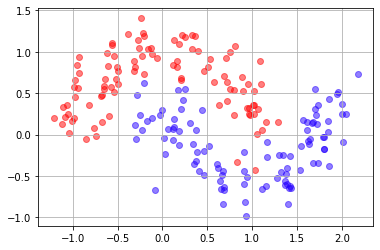

In [75]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(0.480375, 0.519625)

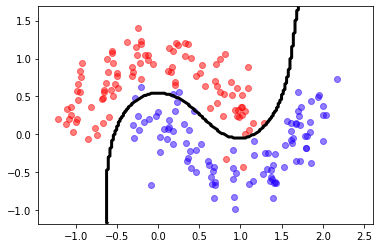

In [76]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [77]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [113]:
def fit_and_predict(estimator, X, y):
    assert len(X)==len(y), "X and y must have the same length"
    Xtrain = X[:X.shape[0]//2]
    Xtest =X[X.shape[0]//2:]
    Ytrain =y[:y.shape[0]//2]
    Ytest =y[y.shape[0]//2:]
    estimator=estimator.fit(Xtrain,Ytrain)
    predictions = estimator.predict(Xtest)
    
    return estimator, predictions

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [114]:
aa=np.array([[1,2],[3,5],[7,5],[9,2]])
print()
aa[:aa.shape[0]//2]
aa[aa.shape[0]//2:]

array([[7, 5],
       [9, 2]])

In [115]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [116]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [117]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [118]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[5 2 6 1 7 2 9 1 7 3 9 3 4 4 5]


In [119]:
y_less_than_5 = y<5
print (y_less_than_5)

[False  True False  True False  True False  True False  True False  True
  True  True False]


and how we can select elements of a vector using a boolean vector of the same length

In [120]:
y[y_less_than_5]

array([2, 1, 2, 1, 3, 3, 4, 4])

In [121]:
y[y<5]

array([2, 1, 2, 1, 3, 3, 4, 4])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [122]:
v = np.random.randint(20, size=15)
v

array([ 4,  5,  9,  9,  7, 17, 19, 14, 19, 10, 16,  7,  1, 12,  0])

In [123]:
v[y<5]

array([ 5,  9, 17, 14, 10,  7,  1, 12])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [124]:
def select_per_class(X, y):
    X1 = X[y==0]
    X2 = X[y==1]
    return X1, X2

check manually your code

In [125]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [126]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [127]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [130]:
def accuracy(y_true, y_pred):
    result = sum((y_true==y_pred))/len(y_true)
    return result

In [131]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

0.375

**submit your code**

In [132]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [133]:

def split_fit_predict(estimator, X, y, train_pct):
    
    def split_data(X, y, pct):
    
        assert len(X)==len(y), "X and y must have the same length"
        assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
        
        n = len(X)
        permutation = np.random.permutation(n)
        n1_elements = int(n*pct)
        permutation_partition_1 =permutation[:n1_elements]
        permutation_partition_2 = permutation[n1_elements:]

        
        print(X[:2])
        X1 =X[permutation_partition_1]
        X2 = X[permutation_partition_2]
        y1 = y[permutation_partition_1]
        y2 = y[permutation_partition_2]
        return X1, X2, y1, y2
    
    def accuracy(y_true, y_pred):
        result = sum((y_true==y_pred))/len(y_true)
        return result

    Xtr, Xts, ytr, yts = split_data(X,y,train_pct)
    estimator.fit(Xtr,ytr)
    preds_ts = estimator.predict(Xts) 
    return estimator, Xts, yts, accuracy(yts, preds_ts)
        
        

In [134]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


[[ 1.27298528 -0.18430332]
 [-0.3862434   0.09647266]]


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), array([[ 0.36569237,  1.01296102],
        [ 1.53331354, -0.38903461],
        [ 0.93966425,  0.230451  ],
        [ 2.13162528,  0.1051496 ],
        [ 1.27298528, -0.18430332],
        [ 1.06864243, -0.38694484],
        [-0.57490295,  0.8243904 ],
        [ 0.92570191,  0.29136214],
        [ 1.35403287,  0.10633552],
        [ 0.83092584,  0.79923605]]), array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0]), 0.7)

**submit your code**

In [135]:
student.submit_task(globals(), task_id="task_05");
